<a href="https://colab.research.google.com/github/CristobalSVM/Aprendizaje-Automatico/blob/main/Tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar libreria para abrir xlsx o csv.
import pandas as pd

#Acceso a google drive
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

#Carga de base
bd_BR = "/content/drive/MyDrive/Tarea 2 BD_BR.xlsx"
df = pd.read_excel(bd_BR)
df

Mounted at /content/drive


,id,fecha,activo,vista,plazo,prestamos interbancarios,sucursales,cajeros,tarjetas
0,1.0,201612.0,9.748517e+10,2.922565e+10,3.542812e+10,6.761324e+09,147.0,274.0,75627.0
1,2.0,201701.0,9.912669e+10,2.913157e+10,3.661224e+10,6.610840e+09,149.0,283.0,76116.0
2,3.0,201702.0,9.860860e+10,2.834034e+10,3.770951e+10,6.352306e+09,149.0,282.0,77057.0
3,4.0,201703.0,9.858651e+10,2.855841e+10,3.813770e+10,6.238445e+09,149.0,284.0,78379.0
4,5.0,201704.0,9.731282e+10,2.946925e+10,3.867970e+10,6.377189e+09,149.0,283.0,79406.0
...,...,...,...,...,...,...,...,...,...
56,57.0,202108.0,1.601921e+11,6.032032e+10,4.633195e+10,4.434798e+09,169.0,351.0,205704.0
57,58.0,202109.0,1.600526e+11,6.118401e+10,4.541217e+10,4.333770e+09,170.0,364.0,212165.0
58,59.0,202110.0,1.616247e+11,6.153808e+10,4.461547e+10,4.450421e+09,157.0,349.0,219334.0
59,60.0,202111.0,1.643413e+11,6.303590e+10,4.425472e+10,4.662185e+09,158.0,360.0,227138.0


In [2]:
 # Cambiar tipo de variable 
 convertir = {'id': int,
                'fecha': int,
                'sucursales': int,
                'cajeros': int,
                'tarjetas': int}  
  
df = df.astype(convertir)  

# modificar columnas fecha, activo, vista, plazo, prestamos interbancarios para tener unidades de millones de pesos
df['activo'] = df['activo']/1000000 
df['vista'] = df['vista']/1000000
df['plazo'] = df['plazo']/1000000
df['prestamos interbancarios'] = df['prestamos interbancarios']/1000000
df

,id,fecha,activo,vista,plazo,prestamos interbancarios,sucursales,cajeros,tarjetas
0,1,201612,97485.166229,29225.647457,35428.115940,6761.324060,147,274,75627
1,2,201701,99126.687818,29131.569781,36612.242954,6610.839888,149,283,76116
2,3,201702,98608.600975,28340.337574,37709.507528,6352.305520,149,282,77057
3,4,201703,98586.509106,28558.414751,38137.700755,6238.444715,149,284,78379
4,5,201704,97312.822576,29469.246336,38679.704639,6377.189215,149,283,79406
...,...,...,...,...,...,...,...,...,...
56,57,202108,160192.052221,60320.321810,46331.947444,4434.797863,169,351,205704
57,58,202109,160052.609554,61184.005188,45412.168111,4333.770086,170,364,212165
58,59,202110,161624.690860,61538.079059,44615.468429,4450.421055,157,349,219334
59,60,202111,164341.303018,63035.903530,44254.716609,4662.184942,158,360,227138


In [12]:
# Aplica algún método de filtro a tus datos mediante el uso de SelectKBest

# ANOVA de valor F

import pandas as pd

import matplotlib.pyplot as plt

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

y = df[['activo']]
x = df[['vista','plazo','prestamos interbancarios','sucursales','cajeros','tarjetas']]



In [17]:
#Calcular valor F

from sklearn.feature_selection import f_regression

f = f_regression(x, y)
# Regresa arreglo de estadístico F y valor p
f

(array([410.94905999,  15.47273048,   7.37113188, 357.77774154,
        349.4926592 , 282.24365219]),
 array([2.86698257e-28, 2.22938370e-04, 8.67895560e-03, 9.99088770e-27,
        1.80947167e-26, 3.70806303e-24]))

In [18]:
# Tabla de resultados F
df_f = pd.DataFrame(f[0], index=x.columns)
df_f.columns = ['f']
df_f.sort_values('f', inplace = True, ascending = False)
df_f

,f
vista,410.949060
sucursales,357.777742
cajeros,349.492659
tarjetas,282.243652
plazo,15.472730
prestamos interbancarios,7.371132


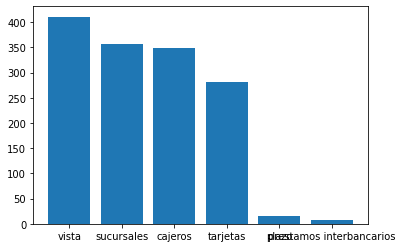

In [19]:
# Gráfica de barras del valor F
plt.figure()
plt.bar(df_f.index, df_f.f)
plt.show()

Las variables vista, sucursales, cajeros y tarjetas estan más relacionadas linealmente con la variable respuesta activo, por lo tanto, estas 4 variables son las seleccionadas.

Las variables plazo y prestamos interbancarios quedan fuera del nuevo conjunto de datos.

In [24]:
df_nuevo = df[['activo','vista','sucursales','cajeros','tarjetas']]
df_nuevo

,activo,vista,sucursales,cajeros,tarjetas
0,97485.166229,29225.647457,147,274,75627
1,99126.687818,29131.569781,149,283,76116
2,98608.600975,28340.337574,149,282,77057
3,98586.509106,28558.414751,149,284,78379
4,97312.822576,29469.246336,149,283,79406
...,...,...,...,...,...
56,160192.052221,60320.321810,169,351,205704
57,160052.609554,61184.005188,170,364,212165
58,161624.690860,61538.079059,157,349,219334
59,164341.303018,63035.903530,158,360,227138
